# Call Backs


**Callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.**


*  Callbacks can help you prevent overfitting, visualize training progress, debug your code, save checkpoints, generate logs, create a TensorBoard, etc. 



* Note a couple of things here. First, callbacks are functions, which implies that you can roll your own if need be. Second, you can use more than one callback to monitor or affect the training of your model.




### When a Callback is Triggered?


Callbacks are called when a certain event is triggered. There are a few types of events during training that can lead to the trigger of a callback, such as:


    (1) on_epoch_begin: as the name suggests, this event is triggered when a new epoch starts.
    
    (2) on_epoch_end: this is triggered when an epoch ends.
    
    (3) on_batch_begin: this is triggered when a new batch is passed for training.
    
    (4) on_batch_end: when a batch is finished with training.
    
    (5) on_train_begin: when the training starts.
    
    (6) on_train_end: when the training ends.
    
    
## CallBacks API   


### EarlyStopping:


* This callback is used very often. This allows us to monitor our metrics, and stop model training when it stops improving. 


* For example, assume that you want to stop training if the accuracy is not improving by 0.05; you can use this callback to do so. This is useful in preventing overfitting of a model, to some extent.



    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    )
    
    monitor: the names of the metrics we want to monitor.
    
    min_delta: the minimum amount of improvement we expect in every epoch.
    
    patience: the number of epochs to wait before stopping the training.
    
    verbose: whether or not to print additional logs.
    
    mode: defines whether the monitored metrics should be increasing, decreasing, or inferred from the name;      
    possible values are 'min', 'max', or 'auto'.
    
    baseline: values for the monitored metrics.
    
    restore_best_weights: if set to True, the model will get the weights of the epoch which has the best value 
    for the monitored metrics; otherwise, it will get the weights of the last epoch.

    The EarlyStopping callback is executed via the on_epoch_end trigger for training.
    
    
    

### ModelCheckpoint:



* This callback allows us to save the model regularly during training. 


* This is especially useful when training deep learning models which take a long time to train. This callback monitors the training and saves model checkpoints at regular intervals, based on the metrics.



    tf.keras.callbacks.ModelCheckpoint(filepath, 
                                     monitor='val_loss', 
                                     verbose=0, 
                                     save_best_only=False,
                                     save_weights_only=False, 
                                     mode='auto', 
                                     save_freq='epoch')
                                     
    filepath: path for saving the model. You can pass the file path with formatting options like model- 
    {epoch:02d}-{val_loss:0.2f}; this saves the model with the mentioned values in the name.
    
    monitor: name of the metrics to monitor.
    
    save_best_only: if True, the best model will not be overridden.
    
    mode: defines whether the monitored metrics should be increasing, decreasing, or inferred from the name;
    possible values are 'min', 'max', or 'auto'.
    
    save_weights_only: if True, only the weights of the models will be saved. Otherwise the full model will be
    saved.
    
    save_freq: if 'epoch', the model will be saved after every epoch. If an integer value is passed, the model 
    will be saved after the integer number of batches (not to be confused with epochs).

    The ModelCheckpoint callback is executed via the on_epoch_end trigger of training.
    
    
    
### TensorBoard:



* This is one of the best callbacks if you want to visualize the training summary for your model. This callback generates the logs for TensorBoard, which you can later launch to visualize the progress of your training



    tf.keras.callbacks.TensorBoard(log_dir='logs',
                                 histogram_freq=0, 
                                 write_graph=True, 
                                 write_images=False,    
                                 update_freq='epoch', 
                                 profile_batch=2, 
                                 embeddings_freq=0,    
                                 embeddings_metadata=None, 
                                 **kwargs)
                                 
    For now we will see only one parameter, log_dir, which is the path of the folder where you need to store the logs. To launch the TensorBoard you need to execute the following command:
    tensorboard --logdir=path_to_your_logs     
    The TensorBoard callback is also triggered at on_epoch_end
    
    
    
### LearningRateScheduler:



* This callback is handy in scenarios where the user wants to update the learning rate as training progresses. For instance, as the training progresses you may want to decrease the learning rate after a certain number of epochs. The LearningRateScheduler will let you do exactly that.

    tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)
    
    schedule: this is a function that takes the epoch index and returns a new learning rate.
    
    verbose: whether or not to print additional logs.
    
    This callback is also triggered at on_epoch_end
    
    
    
### CSVLogger:



* As the name suggests, this callback logs the training details in a CSV file. The logged parameters are epoch, accuracy, loss, val_accuracy, and val_loss. One thing to keep in mind is that you need to pass accuracy as a metric while compiling the model, otherwise you will get an execution error.

    tf.keras.callbacks.CSVLogger(filename, separator=',', append=False)
                             
                             
* The logger accepts the filename, separator, and append as parameters. append defines whether or not to append to an existing file, or write in a new file instead.

* The CSVLogger callback is executed via the on_epoch_end trigger of training. So when an epoch ends, the logs are put into a file.

    

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [3]:
(x_train_full,y_train_full),(x_test_full,y_test_full) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train_val,x_train = x_train_full[0:4000]/255,x_train_full[4000:]/255
y_train_val,y_train = y_train_full[0:4000],y_train_full[4000:]
x_test_full = x_test_full/255

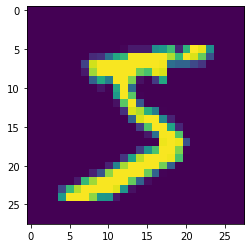

In [167]:
plt.imshow(x_train_val[0])

In [168]:
pd.DataFrame(x_train_val[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,...,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,...,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200,activation="relu",kernel_initializer="he_uniform"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(300,activation="relu",kernel_initializer="he_uniform"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200,activation="relu",kernel_initializer="he_uniform"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [29]:
model.compile("adam",loss="SparseCategoricalCrossentropy",metrics='accuracy')

In [32]:
early_stop_cal_back = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
model_check_points = tf.keras.callbacks.ModelCheckpoint(filepath="modelcheckponits/",monitor="accuracy", save_best_only=True,
                                               save_best_weights=True)

def scheeduler(epoch,lr):
    if epoch < 7:
        return lr 
    else:
        return lr * 0.99
learn_change = tf.keras.callbacks.LearningRateScheduler(scheeduler, verbose=1)
           
csv_logger = tf.keras.callbacks.CSVLogger("csv_logs/csv_logs.csv")
csv_loggers = tf.keras.callbacks.CSVLogger("csv_logs/csv_logss.csv")
ACCURACY_THRESHOLD = 0.95
class CustomCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None): 
#         if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
#             print(f"\nReached {logs.get('accuracy')}'>'{ACCURACY_THRESHOLD*100} accuracy, so stopping training!!")   
#             self.model.stop_training = True
    def on_train_batch_end(self, epoch, logs=None): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print(f"\nReached {logs.get('accuracy')}'>'{ACCURACY_THRESHOLD*100} accuracy, so stopping training!!")   
            self.model.stop_training = True        
#     def on_train_batch_end(self, epoch, logs=None):
#         print(epoch)
#         print(logs)

In [27]:
auto_callbacks = model.fit(x_train,y_train,batch_size=64,epochs=100,validation_data=(x_train_val,y_train_val),callbacks=[early_stop_cal_back,model_check_points,learn_change, csv_logger])

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
875/875 [==============================] - 24s 22ms/step - loss: 0.2212 - accuracy: 0.9319 - val_loss: 0.1193 - val_accuracy: 0.9675
INFO:tensorflow:Assets written to: modelcheckponits/assets
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
875/875 [==============================] - 18s 21ms/step - loss: 0.0974 - accuracy: 0.9696 - val_loss: 0.0938 - val_accuracy: 0.9720
INFO:tensorflow:Assets written to: modelcheckponits/assets
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
875/875 [==============================] - 16s 19ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.0887 - val_accuracy: 0.9750
INFO:tensorflow:Assets written to: modelcheckponits/assets
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
875/875 [===========================

In [33]:
custom_callback = model.fit(x_train,y_train,batch_size=64,epochs=100,validation_data=(x_train_val,y_train_val),callbacks=[learn_change, CustomCallback(), csv_loggers])

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
875/875 [==============================] - 19s 19ms/step - loss: 0.2191 - accuracy: 0.9321 - val_loss: 0.1136 - val_accuracy: 0.9672
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
  1/875 [..............................] - ETA: 17s - loss: 0.1386 - accuracy: 0.9531
Reached 0.953125'>'95.0 accuracy, so stopping training!!
875/875 [==============================] - 0s 467us/step - loss: 0.1386 - accuracy: 0.9531 - val_loss: 0.1135 - val_accuracy: 0.9668


### Observation:


* Model_check_point callback is create one folder path and save model during training monitor based 
    on the metrics folder_name = modelcheckponits/
    
* This callbacks is reduce time to save model and each by each this callbacks is recording and save it    


* EarlyStopping Callbacks allows monitors val_loss coming $8^{th}$ epoch model will be stopped during training And it lead prevent overfitting for saving model
    
    
* Next i use custom callback is doing during on_train_batch_end one condition have accuracy> 0.95 ,So my
    training will be stopped in particular epoch. $2^{nd}$ epochs model will be stopped during training
    This custom callback also prevent overfitting model